In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import objective_functions.ridge_logistic as r

from tqdm import tqdm
from algorithms.gradient_descent import *
from algorithms.nesterov_gradient_descent import *
from algorithms.newton import *
from algorithms.sub_sampled_newton import *
from algorithms.nesterov_sub_sampled_newton import *
from read_data import *
from plots_and_weights.optimality_gaps import *
from plots_and_weights.plot_graph import *


import scipy.io

In [2]:
# https://www.causality.inf.ethz.ch/data/SIDO.html
mat = scipy.io.loadmat('datasets/sido0_matlab/sido0_train.mat')

targets = []
with open('datasets/sido0_matlab/sido0_train.targets', 'r') as file:
    for line in file:
        targets.append(line.strip())      
targets = [int(t) for t in targets]

In [3]:
A = np.array(mat['X'].toarray())
b = np.array(targets)

In [4]:
n, d = A.shape 
A = np.hstack((np.ones((n, 1)), A)) 
d = d + 1  
sum_of_squares = (A**2).sum(axis=0)

sum_of_squares[sum_of_squares == 0] = 1

normalization_factor = np.sqrt(sum_of_squares)

A /= normalization_factor

In [5]:
rl = r.Ridge_Logistic_Regression(0.1)
st = 100 # stop time
sss = [int(0.01 * n), int(0.05 * n), int(0.1 * n)]  # sampling size
lambd = 1
alpha = 0.1
beta = 0.71
w, t = newton(A, b, np.zeros(d), rl, lambd, 1, 150)
w_stars = w[len(t)-1]

Newton computation time: 153.5774838924408


In [6]:
st = 50
# w0, t0 = newton(A, b, np.zeros(d), rl, 1, 1, st)
w1, t1 = sub_sampled_newton_rnss(A, b, np.zeros(d), rl, 1, 1, st, sss[2])
# w2, t2 = gd(A, b, np.zeros(d), rl, lambd, 0.01, st)
# w3, t3 = nesterov_gd(A, b, np.zeros(d), rl, lambd, 0.01, 0.8, st)
w4, t4 = nesterov_sub_sampled_newton_rnss(A, b, np.zeros(d), rl, 1, 1, -1, st, sss[2])

Sub-sampled Newton rnss computation time: 51.70458674430847
Nesterov Sub-sampled Newton rnss computation time: 51.166067123413086


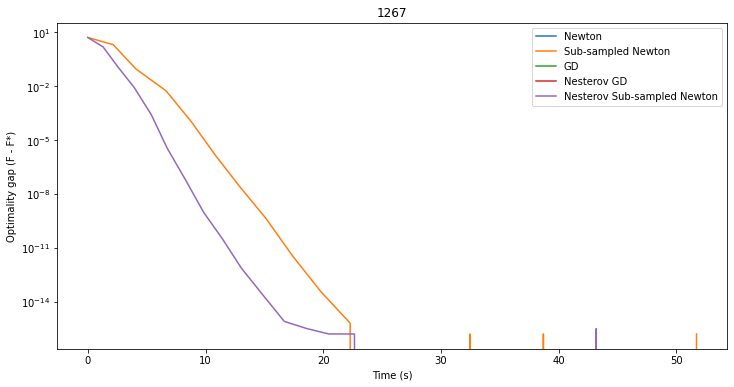

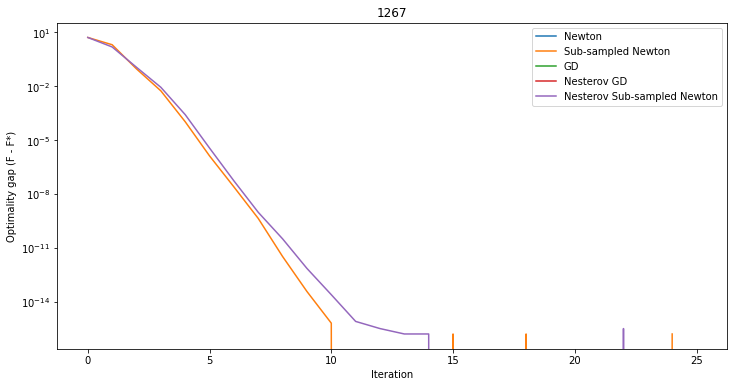

In [7]:
ws = [[],w1,[],[],w4]
ts = [[],t1,[],[],t4]
ts_iters = [np.arange(len(t)) for t in ts]
f_gaps = compute_f_gaps(A, b, ws, ts, w_stars, r.Ridge_Logistic_Regression(1))
plot_graph(ts, f_gaps, 'Time (s)', 'Optimality gap (F - F*)', str(sss[2]))
plot_graph(ts_iters, f_gaps, 'Iteration', 'Optimality gap (F - F*)', str(sss[2]))

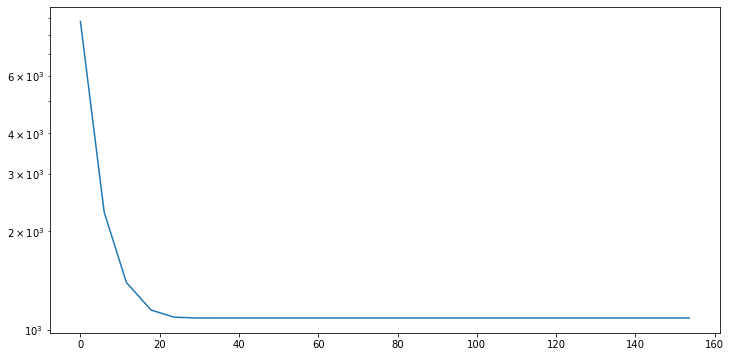

In [8]:
f_gap = []
f_stars = rl.loss(A, b, w[len(t) - 1])
for k in range(len(t)):
    f_gap.append(rl.loss(A, b, w[k]))

fig = plt.figure(figsize=(12, 6)) # set figure size
plt.yscale('log')
plt.plot(t, f_gap)